<a href="https://colab.research.google.com/github/nfilipas/handson-ml3/blob/main/exercises/chapter8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 9

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA

import time

In [ ]:
mnist = fetch_openml("mnist_784", as_frame=False)
X, y = mnist.data, mnist.target
X_train, X_test = X[:60_000], X[60_000:]
y_train, y_test = y[:60_000], y[60_000:]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
rf_clf = RandomForestClassifier(random_state=42)
start_time = time.time()
rf_clf.fit(X_train, y_train)
train_time = time.time() - start_time

In [ ]:
print(f"Training time: {round(train_time)} seconds")
print(f"Accuracy: {rf_clf.score(X_test, y_test)}")

Training time: 55 seconds
Accuracy: 0.9705


In [ ]:
pca = PCA(n_components=0.95, svd_solver="full")
X_train_red = pca.fit_transform(X_train)
X_test_red = pca.transform(X_test)

In [ ]:
print(pca.n_components_)

154


In [ ]:
rf_clf2 = RandomForestClassifier(random_state=42)
start_time = time.time()
rf_clf2.fit(X_train_red, y_train)
train_time = time.time() - start_time

In [ ]:
print(f"Training time: {round(train_time)} seconds")
print(f"Accuracy: {rf_clf2.score(X_test_red, y_test)}")

Training time: 199 seconds
Accuracy: 0.9481


In [ ]:
sgd_clf = SGDClassifier(random_state=42)
start_time = time.time()
sgd_clf.fit(X_train, y_train)
train_time = time.time() - start_time

In [ ]:
print(f"Training time: {round(train_time)} seconds")
print(f"Accuracy: {sgd_clf.score(X_test, y_test)}")

Training time: 243 seconds
Accuracy: 0.874


In [ ]:
sgd_clf2 = SGDClassifier(random_state=42)
start_time = time.time()
sgd_clf2.fit(X_train_red, y_train)
train_time = time.time() - start_time

In [ ]:
print(f"Training time: {round(train_time)} seconds")
print(f"Accuracy: {sgd_clf2.score(X_test_red, y_test)}")

Training time: 47 seconds
Accuracy: 0.8959


# Exercise 10

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

import numpy as np

In [2]:
mnist = fetch_openml("mnist_784", as_frame=False)
X, y = mnist.data[:5000], mnist.target[:5000]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
tsne = TSNE(n_components=2)
X_new = tsne.fit_transform(X)

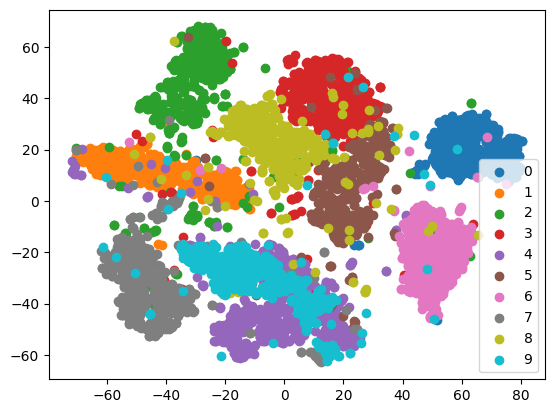

In [4]:
handles = []
labels = []

for target in np.unique(y):
    handle = plt.scatter(X_new[y == target, 0], X_new[y == target, 1])
    handles.append(handle)
    labels.append(str(target))

plt.legend(handles, labels)
plt.show()

In [6]:
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

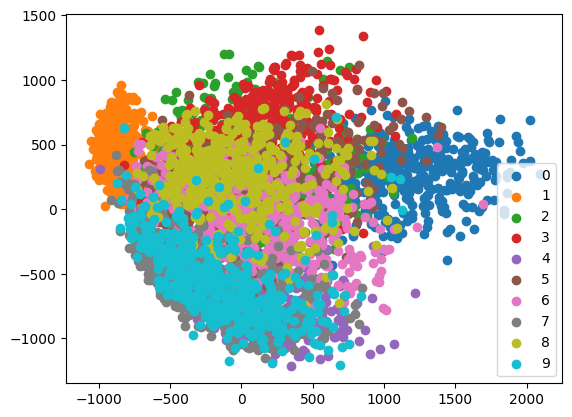

In [7]:
handles = []
labels = []

for target in np.unique(y):
    handle = plt.scatter(X_new[y == target, 0], X_new[y == target, 1])
    handles.append(handle)
    labels.append(str(target))

plt.legend(handles, labels)
plt.show()

In [10]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_new = lle.fit_transform(X)

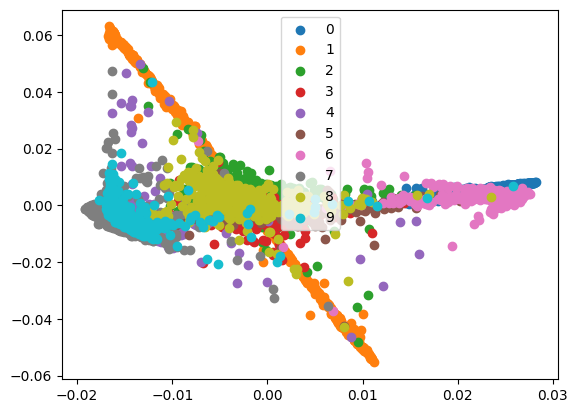

In [11]:
handles = []
labels = []

for target in np.unique(y):
    handle = plt.scatter(X_new[y == target, 0], X_new[y == target, 1])
    handles.append(handle)
    labels.append(str(target))

plt.legend(handles, labels)
plt.show()

In [12]:
mds = MDS(n_components=2, random_state=42)
X_new = mds.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


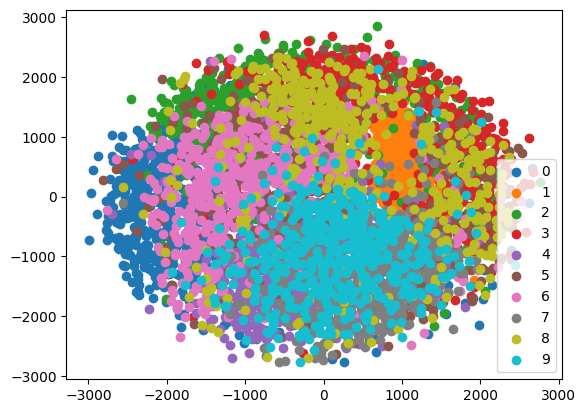

In [13]:
handles = []
labels = []

for target in np.unique(y):
    handle = plt.scatter(X_new[y == target, 0], X_new[y == target, 1])
    handles.append(handle)
    labels.append(str(target))

plt.legend(handles, labels)
plt.show()